<a href="https://www.youtube.com/watch?v=DQ5qqHukkAc" target="_blank">
  <h2>Cálculo de PI</h2>
  <img src="https://img.youtube.com/vi/DQ5qqHukkAc/maxresdefault.jpg" alt="Tutorial de Python" style="width:200px;">
</a>


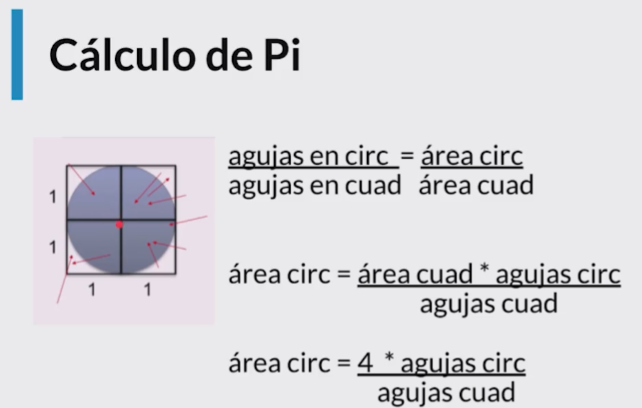

In [9]:
import random
import math

def media(X):
    return sum(X) / len(X)


def varianza(X):
    mu = media(X)

    acumulador = 0
    for x in X:
        acumulador += (x - mu)**2

    return acumulador / len(X)


def desviacion_estandar(X):
    return math.sqrt(varianza(X))


if __name__ == '__main__':
    X = [random.randint(9, 12) for i in range(20)]
    mu = media(X)
    Var = varianza(X)
    sigma = desviacion_estandar(X)

    print(f'Arreglo X: {X}')
    print(f'Media = {mu}')
    print(f'Varianza = {Var}')
    print(f'Desviacion estandar = {sigma}')


Arreglo X: [9, 10, 10, 12, 12, 11, 12, 9, 11, 12, 10, 12, 10, 12, 10, 11, 11, 10, 9, 12]
Media = 10.75
Varianza = 1.1875
Desviacion estandar = 1.0897247358851685


In [10]:
def aventar_agujas(numero_de_agujas):
    agujas_adentro_del_circulo = 0

    for _ in range(numero_de_agujas):
        x = random.random() * random.choice([-1, 1])
        y = random.random() * random.choice([-1, 1])
        distancia_desde_el_centro = math.sqrt(x**2 + y**2)

        if distancia_desde_el_centro <= 1:
            agujas_adentro_del_circulo += 1

    # PI = 4(Agujas del círculo/Agujas Totales)
    return (4 * agujas_adentro_del_circulo) / numero_de_agujas  # 


def estimacion(numero_de_agujas, numero_de_intentos):
    estimados = []
    for _ in range(numero_de_intentos):
        estimacion_pi = aventar_agujas(numero_de_agujas)
        estimados.append(estimacion_pi)

    media_estimados = media(estimados)
    sigma = desviacion_estandar(estimados)

    # La variable media_estimados tiene los resultados sobre 1/2 del área del
    # círculo. Para obtener la estimación de PI completo lo vamos a multiplicar por 2.
    print(f'Est={round(media_estimados, 5)}, sigma={round(sigma, 5)}, agujas={numero_de_agujas}')

    return (media_estimados, sigma)

def estimar_pi(precision, numero_de_intentos):
    numero_de_agujas = 1000
    sigma = precision
    # el 95% de confianza se encuentra a 1.96 desvíos estandars
    while sigma >= precision / 1.96:
        media, sigma = estimacion(numero_de_agujas, numero_de_intentos)
        numero_de_agujas *= 2

    return media

if __name__ == '__main__':
    estimar_pi(0.01, 100)

Est=3.14388, sigma=0.05099, agujas=1000
Est=3.14322, sigma=0.03695, agujas=2000
Est=3.14223, sigma=0.02629, agujas=4000
Est=3.14322, sigma=0.01987, agujas=8000
Est=3.14261, sigma=0.01283, agujas=16000
Est=3.14238, sigma=0.00886, agujas=32000
Est=3.14176, sigma=0.00646, agujas=64000
Est=3.14123, sigma=0.00469, agujas=128000


In [11]:
aventar_agujas(5000)

3.1608

In [12]:
print (random.random())
print (random.random())

0.05036755781320523
0.7445651607123427


In [13]:
print (random.choice([-1, 1]))
print (random.choice([-1, 1]))

-1
-1


In [14]:
print (random.random() * random.choice([-1, 1]))
print (random.random() * random.choice([-1, 1]))

-0.9061348506257869
-0.7457874774664214


In [15]:
import os
import random
import math
import statistics as std
# from bokeh.plotting import figure, output_file, show

# for plotting
from bokeh.plotting import figure, show
# Show plot in notebook, esto me sirve para mostrar la gráfica en el notebook y no abrir el navegador automáticamente.
from bokeh.io import output_notebook
output_notebook()

os.system('cls')

tries = 10
puntos = 100

def estimar_pi(puntos):
    in_circle_x = []
    in_circle_y = []
    out_circle_x = []
    out_circle_y = []
    pi_array = []

    for i in range(puntos):
        pos_x = random.uniform(-1, 1)
        pos_y = random.uniform(-1, 1)

        if math.sqrt(pos_x ** 2 + pos_y ** 2) <= 1:
            in_circle_x.append(pos_x)
            in_circle_y.append(pos_y)
        else:
            out_circle_x.append(pos_x)
            out_circle_y.append(pos_y)

    estimate_pi = (4 * len(in_circle_x)) / puntos
    return (estimate_pi, in_circle_x, in_circle_y, out_circle_x, out_circle_y)

def crear_muestra(tries):
    pi_array = []
    for i in range(tries):
        pivalor, in_circle_x, in_circle_y, out_circle_x, out_circle_y = estimar_pi(puntos)
        pi_array.append(pivalor)
    return (pi_array, in_circle_x, in_circle_y, out_circle_x, out_circle_y)

deviation = 1
presicion = 0.1
iteration = 1

while deviation >= (presicion / 1.96):
    pi_array, in_circle_x, in_circle_y, out_circle_x, out_circle_y = crear_muestra(tries)
    deviation = std.stdev(pi_array)
    variance = std.variance(pi_array) 
    mean = std.mean(pi_array)
    
    print(f'------------------ Iteracion number: {iteration} ------------------')
    print(f'Standard deviation: {round(deviation, 5)}, Variance: {round(variance, 5)}, pi estimated: {round(mean, 5)}')
    print(f'Numero de intentos {tries}, Numero de puntos {puntos}\n\n')
    
    puntos *= 10
    tries *= 10
    iteration += 1

# output_file("line.html") # DEBE DIBUJAR UN CIRCULO CON INTERIOR ROJO
plot = figure(width=600, height=600)
plot.scatter(in_circle_x, in_circle_y, size=5, color="red", alpha=0.5)
plot.scatter(out_circle_x, out_circle_y, size=5, color="navy", alpha=0.5)
show(plot)


Loading BokehJS ...

------------------ Iteracion number: 1 ------------------
Standard deviation: 0.16006, Variance: 0.02562, pi estimated: 3.108
Numero de intentos 10, Numero de puntos 100


------------------ Iteracion number: 2 ------------------
Standard deviation: 0.05503, Variance: 0.00303, pi estimated: 3.14024
Numero de intentos 100, Numero de puntos 1000


------------------ Iteracion number: 3 ------------------
Standard deviation: 0.01659, Variance: 0.00028, pi estimated: 3.14058
Numero de intentos 1000, Numero de puntos 10000




In [16]:
import os
os.system('cls')
import random
import math
import statistics as std
from bokeh.plotting import figure, show


# Show plot in notebook
from bokeh.io import output_notebook
output_notebook()

tries = 10
puntos = 100

def estimar_pi(puntos):
    in_circle_x = []
    in_circle_y = []
    out_circle_x = []
    out_circle_y = []

    for i in range(puntos):
        pos_x = random.uniform(-1, 1)
        pos_y = random.uniform(-1, 1)

        if math.sqrt(pos_x ** 2 + pos_y ** 2) <= 1:
            in_circle_x.append(pos_x)
            in_circle_y.append(pos_y)
        else:
            out_circle_x.append(pos_x)
            out_circle_y.append(pos_y)

    estimate_pi = (4 * len(in_circle_x)) / puntos
    return (estimate_pi, in_circle_x, in_circle_y, out_circle_x, out_circle_y)

def crear_muestra(tries):
    pi_array = []
    for i in range(tries):
        pivalor, in_circle_x, in_circle_y, out_circle_x, out_circle_y = estimar_pi(puntos)
        pi_array.append(pivalor)
    return (pi_array, in_circle_x, in_circle_y, out_circle_x, out_circle_y)

deviation = 1
presicion = 0.1
iteration = 1

while deviation >= (presicion / 1.96):
    pi_array, in_circle_x, in_circle_y, out_circle_x, out_circle_y = crear_muestra(tries)
    deviation = std.stdev(pi_array)
    variance = std.variance(pi_array) 
    mean = std.mean(pi_array)
    
    print(f'------------------ Iteracion number: {iteration} ------------------')
    print(f'Standard deviation: {round(deviation, 5)}, Variance: {round(variance, 5)}, pi estimated: {round(mean, 5)}')
    print(f'Numero de intentos {tries}, Numero de puntos {puntos}\n\n')
    
    # Dibujar el círculo con interior rojo
    plot = figure(width=600, height=600)
    plot.scatter(in_circle_x, in_circle_y, size=5, color="red", alpha=0.5)
    plot.scatter(out_circle_x, out_circle_y, size=5, color="navy", alpha=0.5)
    show(plot)
    
    puntos *= 10
    tries *= 10
    iteration += 1


Loading BokehJS ...

------------------ Iteracion number: 1 ------------------
Standard deviation: 0.12536, Variance: 0.01572, pi estimated: 3.144
Numero de intentos 10, Numero de puntos 100




------------------ Iteracion number: 2 ------------------
Standard deviation: 0.04803, Variance: 0.00231, pi estimated: 3.13156
Numero de intentos 100, Numero de puntos 1000


